<a href="https://colab.research.google.com/github/Hasmita09/AIMLMonth2023/blob/main/Implementation_Google_Play_Store_Apps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Exploratory Data Analysis and App Rating Prediction for Google Play Store Apps**

**Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read the first CSV file**

In [ ]:
data1 = pd.read_csv(r"/content/drive/MyDrive/major project/googleplaystore.csv")

**Read the second CSV file**

In [ ]:
data2 = pd.read_csv(r"/content/drive/MyDrive/major project/googleplaystore_user_reviews.csv")

**Print column names for data1 and data2 to identify common column**

In [ ]:
print("Columns in data1:", data1.columns)
print("Columns in data2:", data2.columns)

Columns in data1: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')
Columns in data2: Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


**Merge the two dataframes based on the identified common column**

In [ ]:
data = pd.merge(data1, data2)
print(data.head())

                   App        Category  Rating Reviews Size  Installs  Type  \
0  Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+  Free   
1  Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+  Free   
2  Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+  Free   
3  Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+  Free   
4  Coloring book moana  ART_AND_DESIGN     3.9     967  14M  500,000+  Free   

  Price Content Rating                     Genres      Last Updated  \
0     0       Everyone  Art & Design;Pretend Play  January 15, 2018   
1     0       Everyone  Art & Design;Pretend Play  January 15, 2018   
2     0       Everyone  Art & Design;Pretend Play  January 15, 2018   
3     0       Everyone  Art & Design;Pretend Play  January 15, 2018   
4     0       Everyone  Art & Design;Pretend Play  January 15, 2018   

  Current Ver   Android Ver  \
0       2.0.0  4.0.3 and up   
1       2.0.0  4.0.3 and up   
2    

**Basic data analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122662 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Category                122662 non-null  object 
 2   Rating                  122622 non-null  float64
 3   Reviews                 122662 non-null  object 
 4   Size                    122662 non-null  object 
 5   Installs                122662 non-null  object 
 6   Type                    122662 non-null  object 
 7   Price                   122662 non-null  object 
 8   Content Rating          122662 non-null  object 
 9   Genres                  122662 non-null  object 
 10  Last Updated            122662 non-null  object 
 11  Current Ver             122662 non-null  object 
 12  Android Ver             122662 non-null  object 
 13  Translated_Review       72605 non-null   object 
 14  Sentiment           

In [ ]:
data.shape

(122662, 17)

In [ ]:
data.isnull().any()

App                       False
Category                  False
Rating                     True
Reviews                   False
Size                      False
Installs                  False
Type                      False
Price                     False
Content Rating            False
Genres                    False
Last Updated              False
Current Ver               False
Android Ver               False
Translated_Review          True
Sentiment                  True
Sentiment_Polarity         True
Sentiment_Subjectivity     True
dtype: bool

In [ ]:
data.isnull().sum()

App                           0
Category                      0
Rating                       40
Reviews                       0
Size                          0
Installs                      0
Type                          0
Price                         0
Content Rating                0
Genres                        0
Last Updated                  0
Current Ver                   0
Android Ver                   0
Translated_Review         50057
Sentiment                 50047
Sentiment_Polarity        50047
Sentiment_Subjectivity    50047
dtype: int64

**Clean the data by dropping rows with missing values**

In [ ]:
data = data.dropna()
data.isnull().any()

App                       False
Category                  False
Rating                    False
Reviews                   False
Size                      False
Installs                  False
Type                      False
Price                     False
Content Rating            False
Genres                    False
Last Updated              False
Current Ver               False
Android Ver               False
Translated_Review         False
Sentiment                 False
Sentiment_Polarity        False
Sentiment_Subjectivity    False
dtype: bool

In [ ]:
data.shape

(72566, 17)

**Data transformation: Convert 'Size' to numeric values in MB**

In [ ]:
data["Size"] = [float(i.split('M')[0]) if isinstance(i, str) and 'M' in i else float(0) for i in data["Size"]]
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [ ]:
data["Size"] = 1000 * data["Size"]
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122646,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,0.0,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
122652,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,0.0,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
122659,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,0.0,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
122660,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,0.0,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000


**Convert 'Reviews' to float**

In [ ]:
data["Reviews"] = data["Reviews"].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72566 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     72566 non-null  object 
 1   Category                72566 non-null  object 
 2   Rating                  72566 non-null  float64
 3   Reviews                 72566 non-null  float64
 4   Size                    72566 non-null  float64
 5   Installs                72566 non-null  object 
 6   Type                    72566 non-null  object 
 7   Price                   72566 non-null  object 
 8   Content Rating          72566 non-null  object 
 9   Genres                  72566 non-null  object 
 10  Last Updated            72566 non-null  object 
 11  Current Ver             72566 non-null  object 
 12  Android Ver             72566 non-null  object 
 13  Translated_Review       72566 non-null  object 
 14  Sentiment               72566 non-nul

**Convert 'Installs' to numeric values**

In [ ]:
data["Installs"] = data["Installs"].apply(lambda x: float(x.replace('+', '').replace(',', '')) if isinstance(x, str) else float(x))
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [ ]:
data["Installs"] = data["Installs"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72566 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     72566 non-null  object 
 1   Category                72566 non-null  object 
 2   Rating                  72566 non-null  float64
 3   Reviews                 72566 non-null  float64
 4   Size                    72566 non-null  float64
 5   Installs                72566 non-null  int64  
 6   Type                    72566 non-null  object 
 7   Price                   72566 non-null  object 
 8   Content Rating          72566 non-null  object 
 9   Genres                  72566 non-null  object 
 10  Last Updated            72566 non-null  object 
 11  Current Ver             72566 non-null  object 
 12  Android Ver             72566 non-null  object 
 13  Translated_Review       72566 non-null  object 
 14  Sentiment               72566 non-nul

**Convert 'Price' to numeric values**

In [ ]:
data['Price'] = [float(i.split('$')[1]) if isinstance(i, str) and '$' in i else 0.0 for i in data['Price']]
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800,0.900000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72566 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     72566 non-null  object 
 1   Category                72566 non-null  object 
 2   Rating                  72566 non-null  float64
 3   Reviews                 72566 non-null  float64
 4   Size                    72566 non-null  float64
 5   Installs                72566 non-null  int64  
 6   Type                    72566 non-null  object 
 7   Price                   72566 non-null  float64
 8   Content Rating          72566 non-null  object 
 9   Genres                  72566 non-null  object 
 10  Last Updated            72566 non-null  object 
 11  Current Ver             72566 non-null  object 
 12  Android Ver             72566 non-null  object 
 13  Translated_Review       72566 non-null  object 
 14  Sentiment               72566 non-nul

**Clean data by dropping rows with inappropriate values**

In [ ]:
data.drop(data[(data['Reviews'] < 1) & (data['Reviews'] > 5 )].index, inplace = True)
data.shape

(72566, 17)

In [ ]:
data.drop(data[data['Installs'] < data['Reviews'] ].index, inplace = True)
data.shape

(72566, 17)

In [ ]:
data.drop(data[(data['Type'] =='Free') & (data['Price'] > 0 )].index, inplace = True)
data.shape

(72566, 17)

In [ ]:
data.drop(data[data['Price'] > 200].index, inplace = True)
data.shape

(72566, 17)

In [ ]:
data.drop(data[data['Reviews'] > 2000000].index, inplace = True)
data.shape

(56121, 17)

In [ ]:
data.drop(data[data['Installs'] > 10000000].index, inplace = True)
data.shape

(44719, 17)

**Visualizations**

<Axes: >

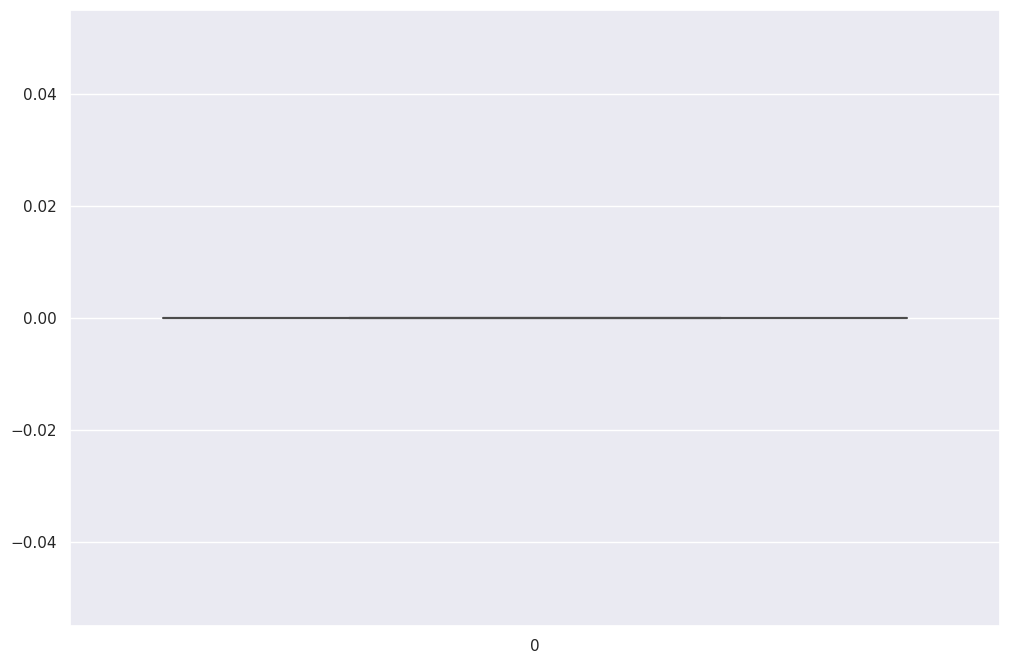

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data['Price'])

<Axes: >

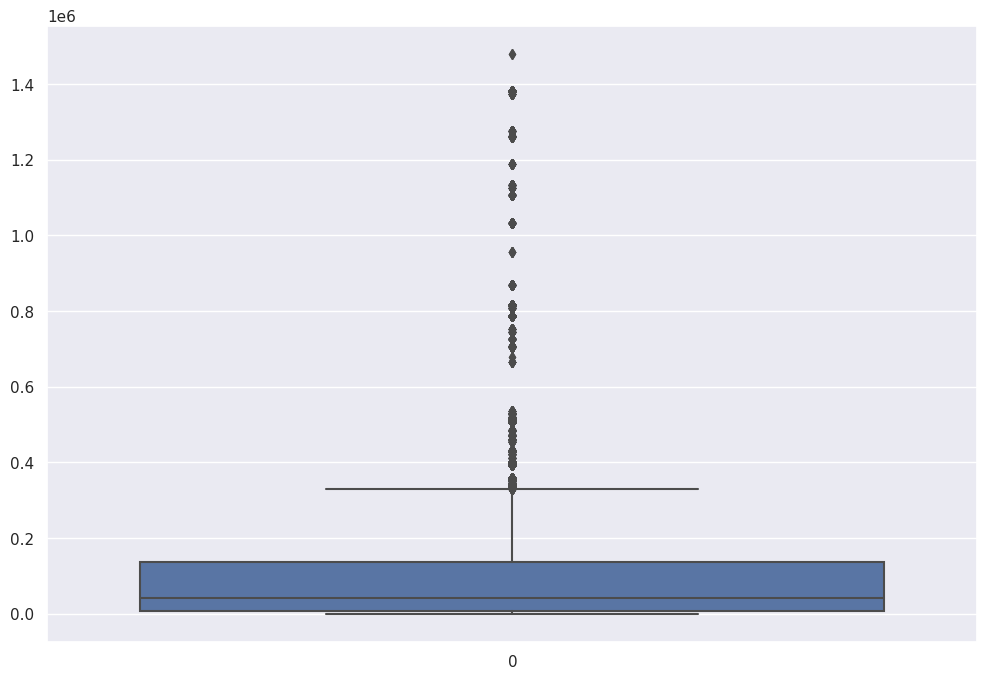

In [ ]:
sns.boxplot(data['Reviews'])

<Axes: >

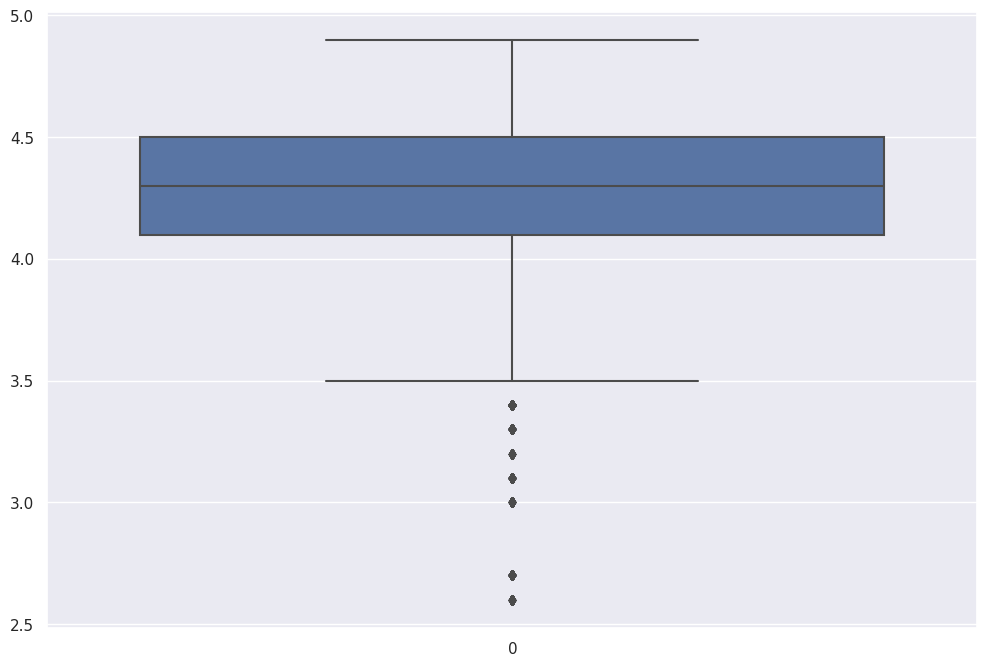

In [ ]:
sns.boxplot(data['Rating'])

<Axes: >

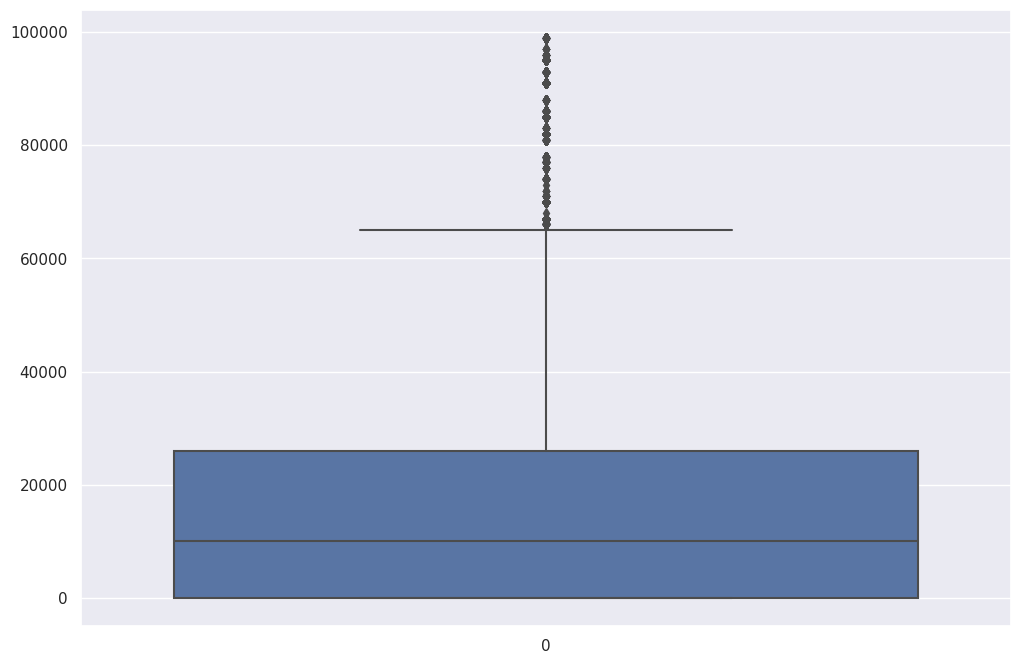

In [ ]:
sns.boxplot(data['Size'])

In [ ]:
more = data.apply(lambda x : True
            if x['Price'] > 200 else False, axis = 1)
more_count = len(more[more == True].index)
data.shape

(44719, 17)

In [ ]:
data.drop(data[data['Price'] > 200].index, inplace = True)
data.shape

(44719, 17)

In [ ]:
data.drop(data[data['Reviews'] > 2000000].index, inplace = True)
data.shape

(44719, 17)

In [ ]:
numeric_columns = ["Size", "Installs", "Price"]
quantiles = [0.1, 0.25, 0.5, 0.7, 0.9, 0.95, 0.99]

quantile_data = data[numeric_columns].quantile(quantiles)

print(quantile_data)

         Size    Installs  Price
0.10      0.0    100000.0    0.0
0.25      0.0   1000000.0    0.0
0.50  10000.0   5000000.0    0.0
0.70  22000.0  10000000.0    0.0
0.90  50000.0  10000000.0    0.0
0.95  67000.0  10000000.0    0.0
0.99  95000.0  10000000.0    0.0


**Dropping more than 10000000 Installs value**

In [ ]:
data.drop(data[data['Installs'] > 10000000].index, inplace = True)
data.shape

(44719, 17)

**Scatter plots**

<Axes: xlabel='Rating', ylabel='Price'>

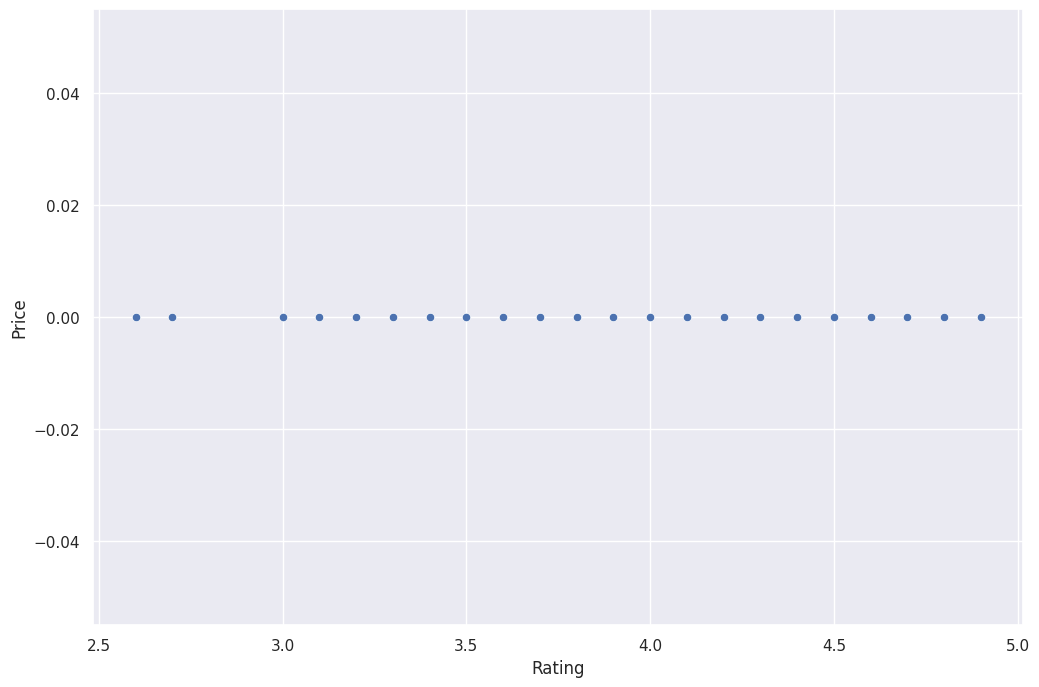

In [ ]:
sns.scatterplot(x='Rating',y='Price',data=data)
#Paid apps are higher ratings comapred to free apps.

<Axes: xlabel='Rating', ylabel='Size'>

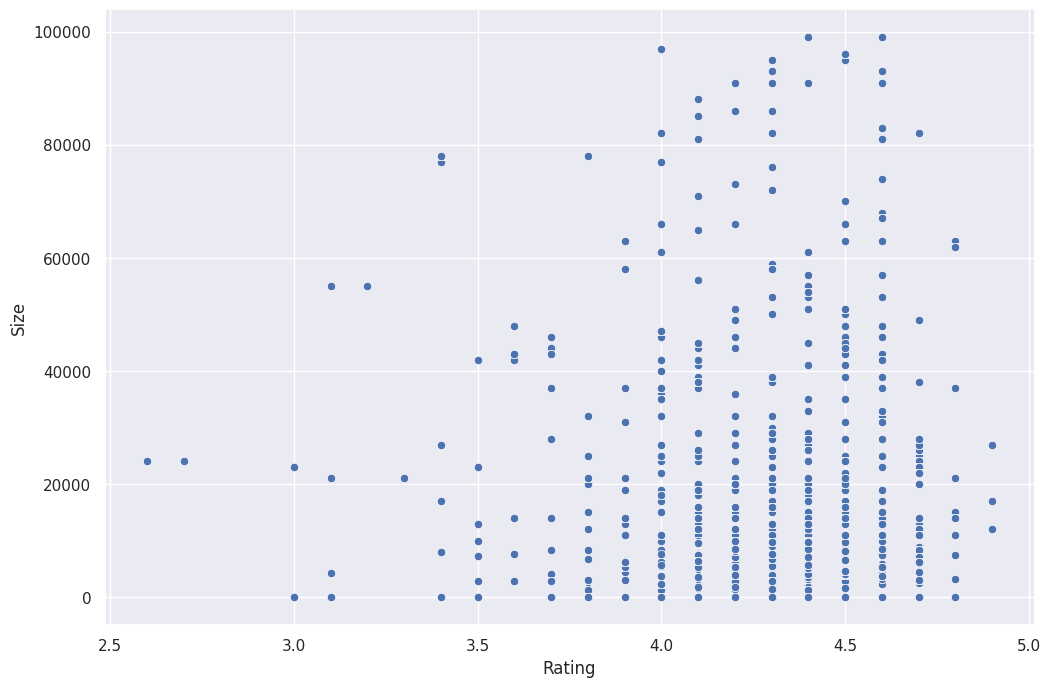

In [ ]:
sns.scatterplot(x='Rating',y='Size',data=data)
#Heavier apps are rated better.

<Axes: xlabel='Rating', ylabel='Reviews'>

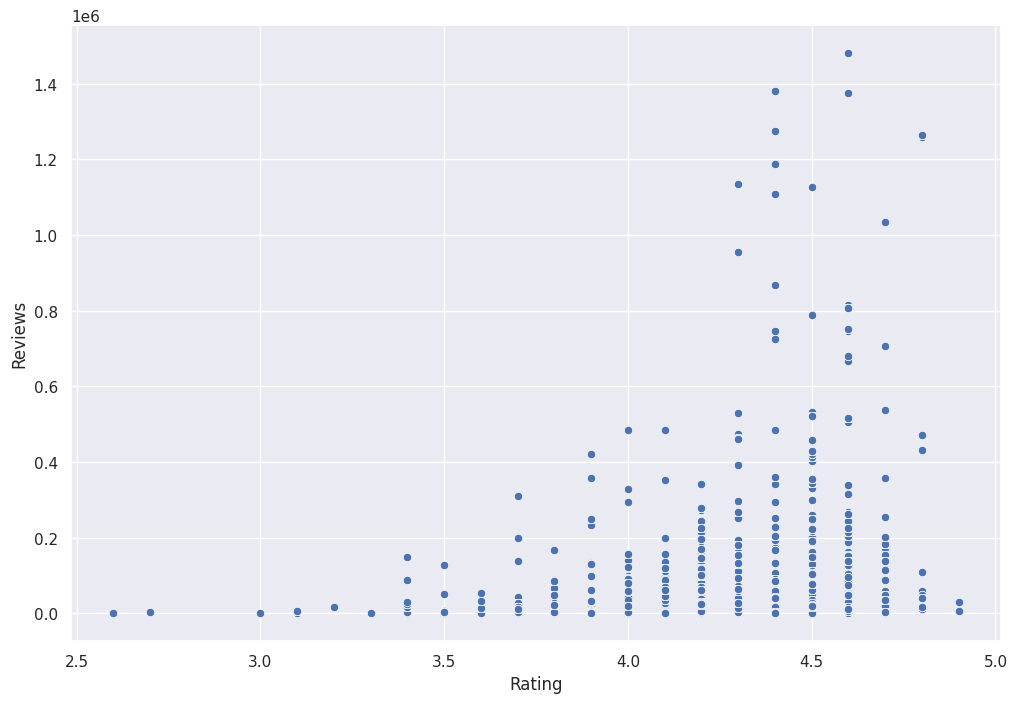

In [ ]:
sns.scatterplot(x='Rating',y='Reviews',data=data)
#More reviews makes app rating better.

**Bar plots**

<Axes: xlabel='Rating', ylabel='Content Rating'>

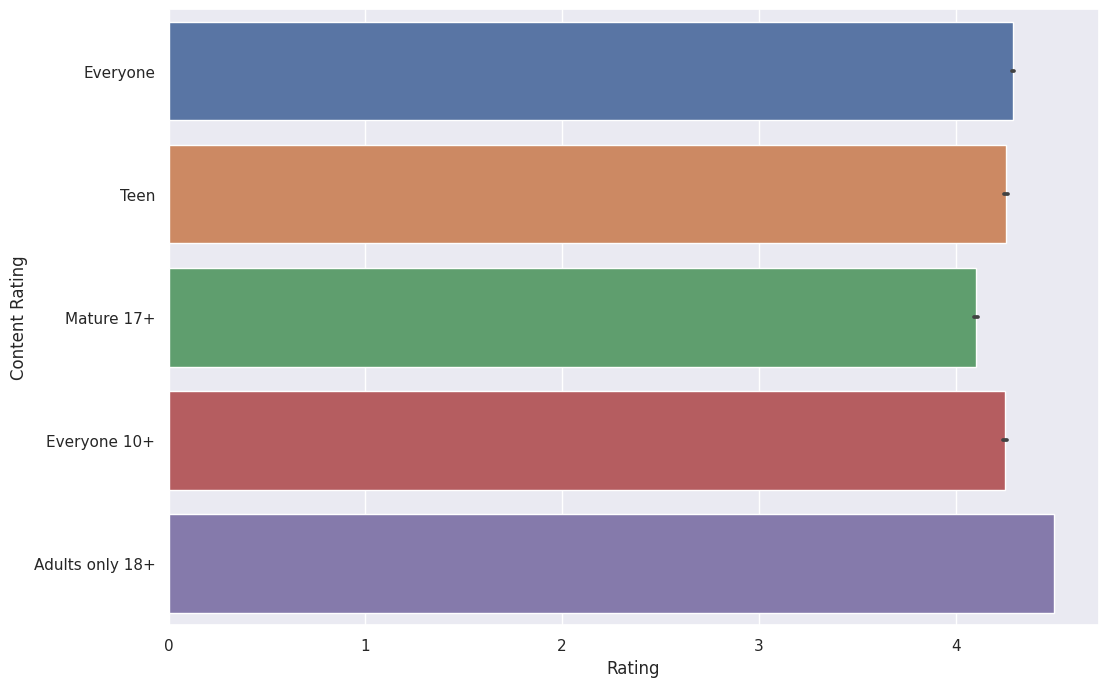

In [ ]:
sns.barplot(x="Rating", y="Content Rating", data=data)
#Apps categorized as "Everyone" tend to exhibit more unfavorable ratings when compared to other sections due to the presence of numerous outlier values. On the contrary, applications classified as "18+" generally showcase higher ratings.

<Axes: xlabel='Rating', ylabel='Category'>

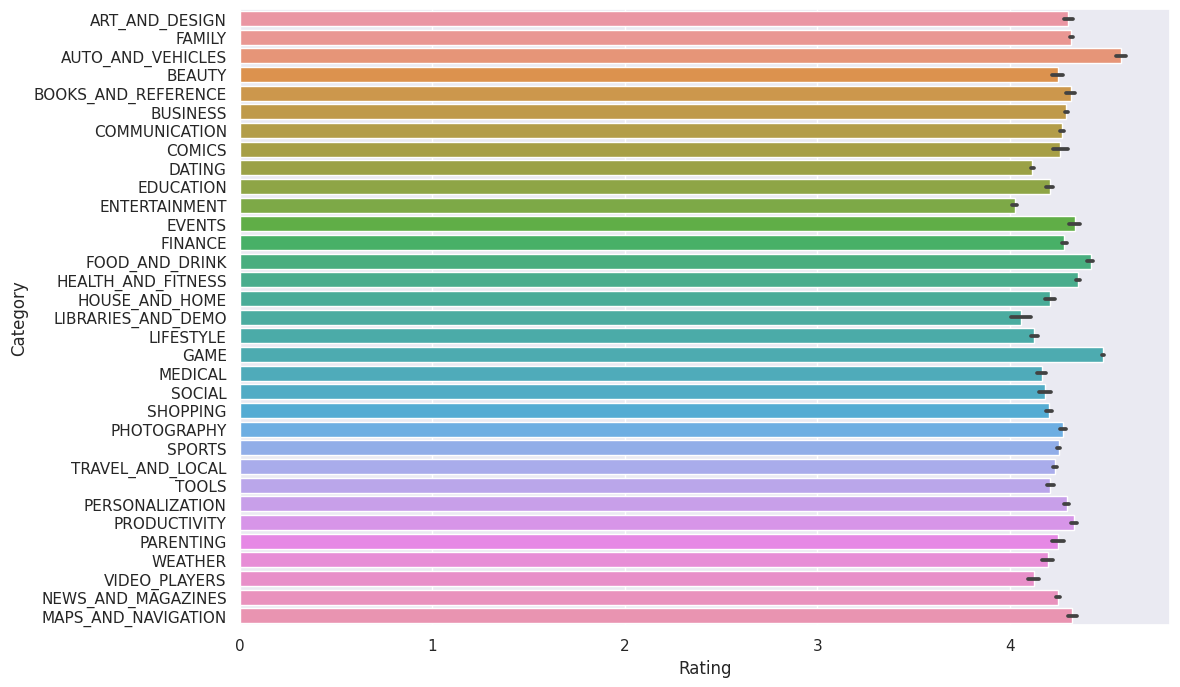

In [ ]:
sns.barplot(x="Rating", y="Category", data=data)
#Events category has best ratings compare to others.

**Logarithmic transformation for skewed features**

In [ ]:
reviewskew = np.log1p(data['Reviews'])
reviewskew.skew()

-0.4823308230098584

In [ ]:
data['Reviews'] = reviewskew
installsskew = np.log1p(data['Installs'])
data['Installs']

0           500000
1           500000
2           500000
4           500000
5           500000
            ...   
122646    10000000
122652    10000000
122659    10000000
122660    10000000
122661    10000000
Name: Installs, Length: 44719, dtype: int64

In [ ]:
installsskew.skew()

-0.9557798581728003

**Dummy encoding for categorical features**

In [ ]:
data_new = data
data_new.Category = pd.Categorical(data_new.Category)
x = data_new[['Category']]
del data_new['Category']
dummies = pd.get_dummies(x, prefix='Category')
data_new = pd.concat([data_new, dummies], axis=1)
data_new.head()

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,Coloring book moana,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0
2,Coloring book moana,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0
4,Coloring book moana,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0
5,Coloring book moana,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",...,0,0,0,0,0,0,0,0,0,0


**Dummy encoding for another categorical feature "Genres"**

In [ ]:
data_new["Genres"].unique()

array(['Art & Design;Pretend Play', 'Art & Design',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Communication', 'Comics',
       'Dating', 'Education', 'Education;Education', 'Entertainment',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle', 'Casual',
       'Puzzle;Brain Games', 'Arcade', 'Puzzle', 'Casual;Creativity',
       'Board', 'Adventure', 'Role Playing', 'Action', 'Strategy',
       'Simulation;Education', 'Simulation', 'Action;Action & Adventure',
       'Casual;Brain Games', 'Simulation;Action & Adventure',
       'Educational;Creativity', 'Educational;Education',
       'Educational;Pretend Play', 'Racing;Action & Adventure',
       'Entertainment;Music & Video', 'Educational;Brain Games',
       'Casual;Action & Adventure', 'Education;Pretend Play',
       'Simulation;Pretend Play', 'Sports;Action & Adventure',
       'Role Playing;Action & Adv

In [ ]:
lists = []
for i in data_new.Genres.value_counts().index:
    if data_new.Genres.value_counts()[i] < 20:
        lists.append(i)
data_new.Genres = ['Other' if i in lists else i for i in data_new.Genres]
data_new.Genres = pd.Categorical(data_new['Genres'])
x = data_new[["Genres"]]
del data_new['Genres']
dummies = pd.get_dummies(x, prefix='Genres')
data_new = pd.concat([data_new, dummies], axis=1)
data_new

,App,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,...,Genres_Simulation;Action & Adventure,Genres_Simulation;Education,Genres_Social,Genres_Sports,Genres_Sports;Action & Adventure,Genres_Strategy,Genres_Tools,Genres_Travel & Local,Genres_Video Players & Editors,Genres_Weather
0,Coloring book moana,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,...,0,0,0,0,0,0,0,0,0,0
1,Coloring book moana,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,...,0,0,0,0,0,0,0,0,0,0
2,Coloring book moana,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,...,0,0,0,0,0,0,0,0,0,0
4,Coloring book moana,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,...,0,0,0,0,0,0,0,0,0,0
5,Coloring book moana,3.9,6.875232,14000.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122646,A+ Gallery - Photos & Videos,4.5,12.319142,0.0,10000000,Free,0.0,Everyone,"August 6, 2018",Varies with device,...,0,0,0,0,0,0,0,0,0,0
122652,A+ Gallery - Photos & Videos,4.5,12.319142,0.0,10000000,Free,0.0,Everyone,"August 6, 2018",Varies with device,...,0,0,0,0,0,0,0,0,0,0
122659,A+ Gallery - Photos & Videos,4.5,12.319142,0.0,10000000,Free,0.0,Everyone,"August 6, 2018",Varies with device,...,0,0,0,0,0,0,0,0,0,0
122660,A+ Gallery - Photos & Videos,4.5,12.319142,0.0,10000000,Free,0.0,Everyone,"August 6, 2018",Varies with device,...,0,0,0,0,0,0,0,0,0,0


**Dummy encoding for "Content Rating"**

In [ ]:
data_new['Content Rating'] = pd.Categorical(data_new['Content Rating'])
x = data_new[['Content Rating']]
del data_new['Content Rating']
dummies = pd.get_dummies(x, prefix='Content Rating')
data_new = pd.concat([data_new, dummies], axis=1)

**Model Building and Evaluation**


In [ ]:
d1 = data_new
X = d1.drop('Rating', axis=1)
y = d1['Rating']

**Drop non-numeric columns and rows with missing values**

In [ ]:
data_cleaned = data.select_dtypes(include=['number']).dropna()

# Define X and y
X = data_cleaned.drop('Rating', axis=1)
y = data_cleaned['Rating']

#**Questions based on the project.**

**Problem Statement: Data Cleaning**

**Question: How can we clean and preprocess the dataset to handle missing values, data types, and outliers effectively?**

In [ ]:
# Handling Missing Values
data.drop_duplicates(subset=["App"], inplace=True)
data["Rating"].fillna(data["Rating"].median(), inplace=True)
data.dropna(subset=["Type", "Content Rating"], inplace=True)
data["Reviews"] = data["Reviews"].astype(int)

# Handling 'Size' column
data["Size"] = data["Size"].apply(lambda x: (float(x.replace("M", "").replace("k", "")) * 1000)
                                    if isinstance(x, str) and ("M" in x or "k" in x) else x)

# Ensuring 'Installs' column is in string format
data["Installs"] = data["Installs"].astype(str)
data["Installs"] = data["Installs"].apply(lambda x: int(x.replace("+", "").replace(",", "")))

# Ensuring 'Price' column is in string format
data["Price"] = data["Price"].astype(str)
data["Price"] = data["Price"].apply(lambda x: float(x.replace("$", "")))

data["Last Updated"] = pd.to_datetime(data["Last Updated"])

# Displaying summary statistics of numeric columns
print(data.describe())


           Rating     Reviews          Size      Installs  Price  \
count  702.000000  702.000000    702.000000  7.020000e+02  702.0   
mean     4.262536    9.495726  17437.749288  3.796184e+06    0.0   
std      0.326143    2.044263  22135.007538  4.061351e+06    0.0   
min      2.600000    4.000000      0.000000  1.000000e+03    0.0   
25%      4.100000    8.000000      0.000000  5.000000e+05    0.0   
50%      4.300000   10.000000   9400.000000  1.000000e+06    0.0   
75%      4.500000   11.000000  24000.000000  1.000000e+07    0.0   
max      4.900000   14.000000  99000.000000  1.000000e+07    0.0   

       Sentiment_Polarity  Sentiment_Subjectivity  
count          702.000000              702.000000  
mean             0.174185                0.491758  
std              0.307036                0.223995  
min             -1.000000                0.000000  
25%              0.000000                0.394122  
50%              0.154688                0.511237  
75%              0.3421

**Problem Statement: Exploratory Data Analysis (EDA)**

**Question: What are the patterns, distributions, and relationships among different features in the dataset?**

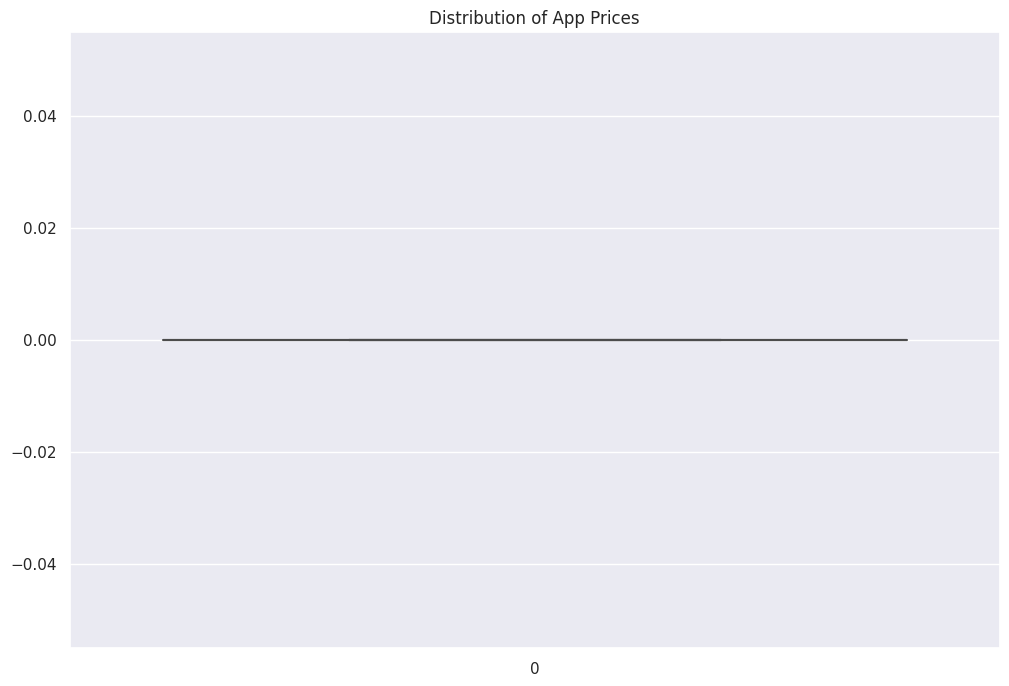

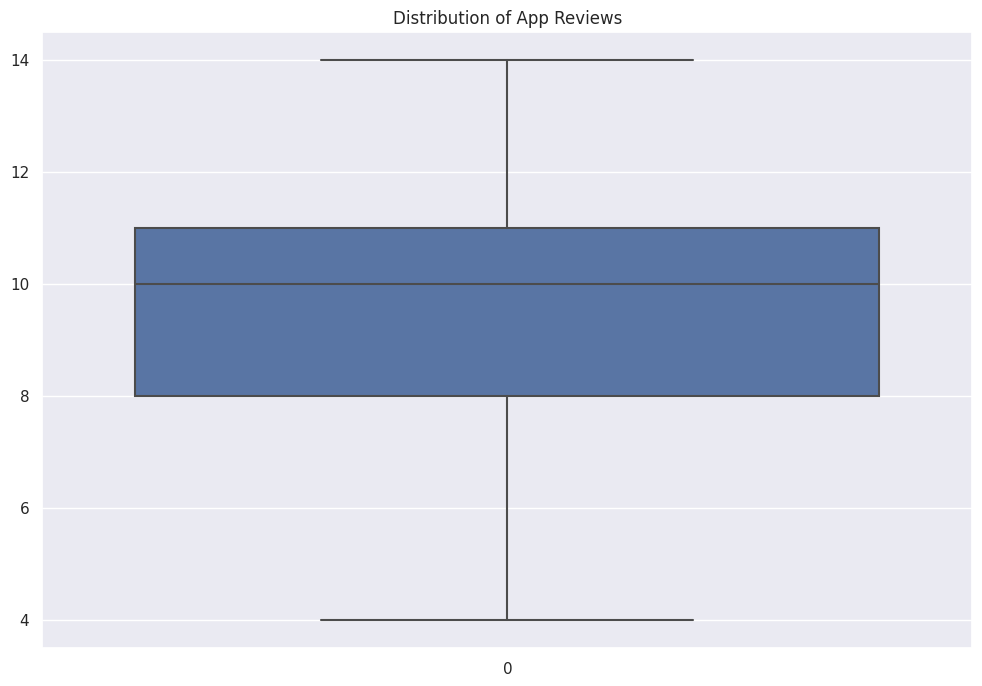

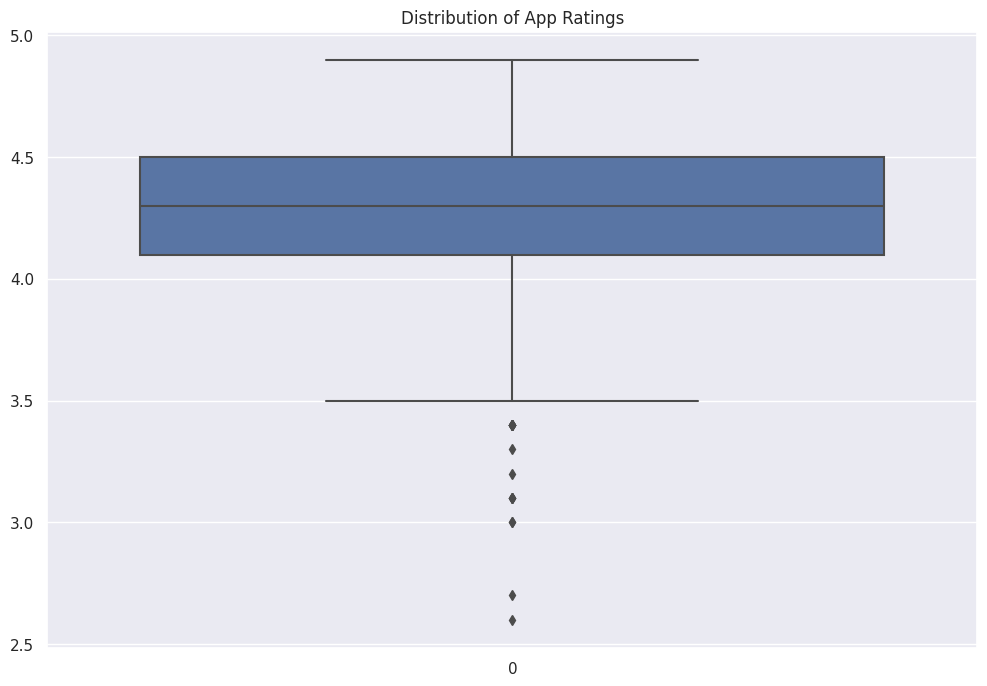

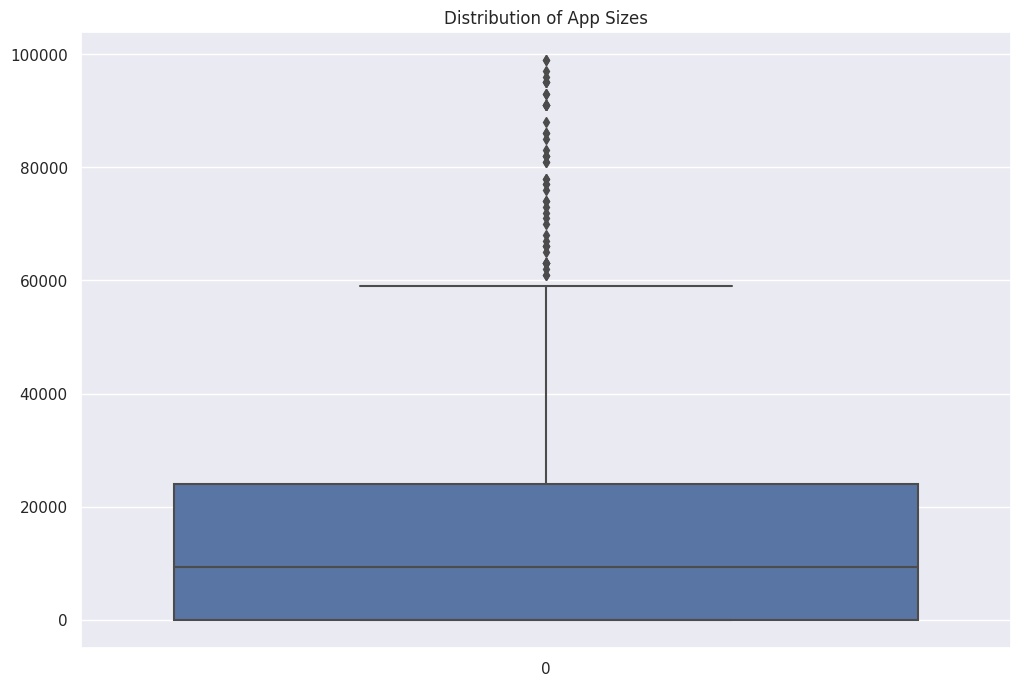

In [ ]:
# EDA - Explore the data visually
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data['Price'])
plt.title("Distribution of App Prices")
plt.show()

sns.boxplot(data['Reviews'])
plt.title("Distribution of App Reviews")
plt.show()

sns.boxplot(data['Rating'])
plt.title("Distribution of App Ratings")
plt.show()

sns.boxplot(data['Size'])
plt.title("Distribution of App Sizes")
plt.show()


**Problem Statement: App Rating Prediction**

**Question: Can we predict the app rating based on other features like reviews, size, installs, and price?**

In [ ]:
# Preparing data for rating prediction
X = data[["Reviews", "Size", "Installs", "Price"]]
y = data["Rating"]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.09636775385731516


**Question: Are there any missing values or duplicate instances in the dataset? If so, how will you handle them?**

In [ ]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

# Checking for duplicate instances based on the 'App' column
duplicate_apps = data[data.duplicated(subset=["App"])]
print("\nDuplicate Instances based on 'App' column:")
print(duplicate_apps)

# Removing duplicate instances
data.drop_duplicates(subset=["App"], inplace=True)

# Handling missing values
# For 'Rating', filling missing values with the median
data["Rating"].fillna(data["Rating"].median(), inplace=True)

# For 'Type' and 'Content Rating', dropping rows with missing values
data.dropna(subset=["Type", "Content Rating"], inplace=True)

# displaying the updated dataset information
print("\nUpdated Dataset Information:")
print(data.info())

Missing Values:
App                       0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Duplicate Instances based on 'App' column:
Empty DataFrame
Columns: [App, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Translated_Review, Sentiment, Sentiment_Polarity, Sentiment_Subjectivity]
Index: []

Updated Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 0 to 122564
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----      

**Question: Perform Data Preprocessing on your dataset**

In [ ]:
# Dropping duplicate rows based on the 'App' column
data.drop_duplicates(subset=["App"], inplace=True)

# Filling missing 'Rating' values with the median of the column
data["Rating"].fillna(data["Rating"].median(), inplace=True)

# Dropping rows with missing values in 'Type' and 'Content Rating' columns
data.dropna(subset=["Type", "Content Rating"], inplace=True)

# Converting 'Reviews' column to integer type
data["Reviews"] = data["Reviews"].astype(int)

# Converting 'Size' column to a common unit (MegaBytes) and handle 'k' values
data["Size"] = data["Size"].apply(lambda x: float(x.replace("M", "").replace("k", "")) * 1000 if isinstance(x, str) and ("M" in x or "k" in x) else x)
data["Size"] = data["Size"] * 1000  # Convert 'k' to 'M'

# Converting 'Installs' column to integer by removing '+' and ',' symbols
data["Installs"] = data["Installs"].apply(lambda x: int(str(x).replace("+", "").replace(",", "")))

# Converting 'Price' column to float by removing '$' symbol
data["Price"] = data["Price"].apply(lambda x: float(str(x).replace("$", "")))

# Converting 'Last Updated' column to datetime format
data["Last Updated"] = pd.to_datetime(data["Last Updated"])

# Splitting the data into features (X) and target variable (y)
X = data.drop('Rating', axis=1)
y = data['Rating']

**Question: Question: You've successfully applied dummy encoding for the "Category" feature in your dataset, but now you want to do the same for another categorical feature, "Genres." How can you achieve this?**

In [ ]:
# Applying dummy encoding for the "Genres" feature
x = data[["Genres"]]
dummies = pd.get_dummies(x, prefix='Genres')
data = pd.concat([data, dummies], axis=1)

Now, the "Genres" feature has been dummy encoded, and you have additional binary features for each genre.

**Question: How does the content rating of apps correlate with their user ratings, and what observations can be made about the distribution of ratings within different content rating categories?**

<Axes: xlabel='Rating', ylabel='Content Rating'>

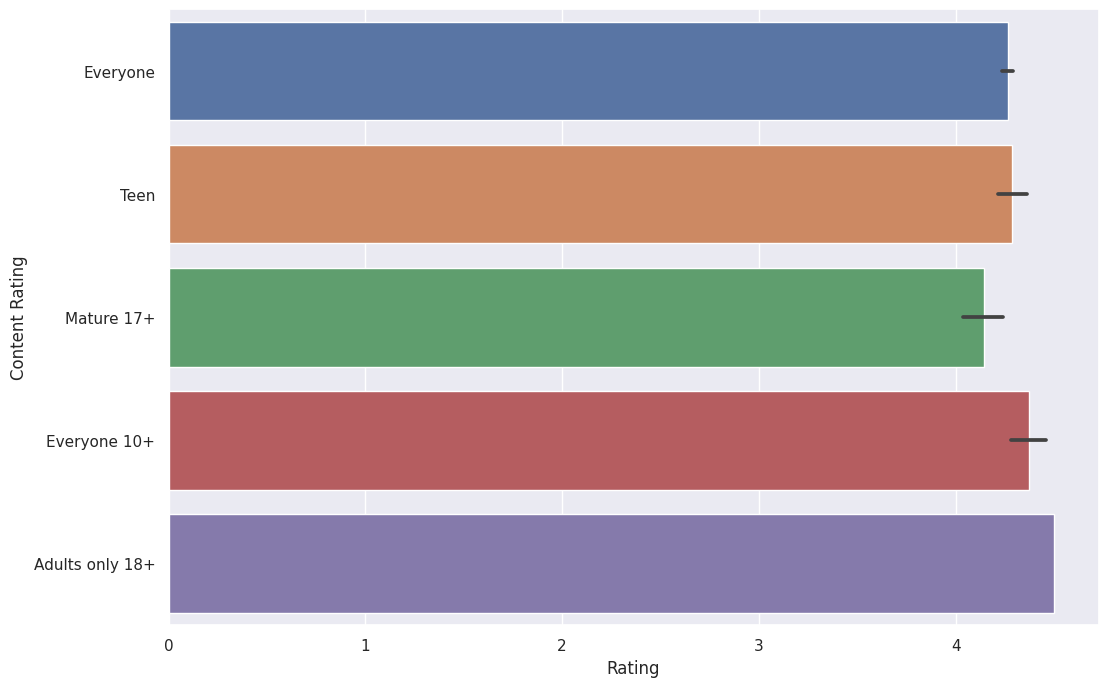

In [ ]:
sns.barplot(x="Rating", y="Content Rating", data=data)

Apps categorized as "Everyone" tend to exhibit more unfavorable ratings when compared to other sections due to the presence of numerous outlier values. On the contrary, applications classified as "18+" generally showcase higher ratings.